# Lab 9.9: Batch Normalization + Dropout + Xavier with MNIST Classifier

**Jonathan Choi 2021**

**[Deep Learning By Torch] End to End study scripts of Deep Learning by implementing code practice with Pytorch.**

If you have an any issue, please PR below.

[[Deep Learning By Torch] - Github @JonyChoi](https://github.com/jonychoi/Deep-Learning-By-Torch)

Here, we are going to adapt the Batch Normalization to the MNIST Classifier, and compare the capability with non-adapting model.

Plus, We are going to compare various models, comparing with adapt / non-adapt models between dropout, batchnorm, weight initialization(Xavier Uniform).

- Model with Batch Normalization, Dropout, Weight Initialization
- Model With Batch Normalization, Dropout
- Model with Batch Normalization
- Model with Batch Normalization, Weight Initialization
- Model with Dropout, Weight Initiailization
- Model with Dropout
- Model with Weight Initialization.
- Model with Nothing

Furthermore, we are going to plot the accuracy of the models with matplotlib.

## Imports

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import random

import matplotlib.pylab as plt

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

torch.manual_seed(1)
random.seed(1)

if device == 'cuda':
    torch.cuda.manual_seed_all(1)

In [3]:
learning_rate = 0.01
training_epochs = 17
batch_size = 32

In [4]:
mnist_train = datasets.MNIST(root = 'MNIST_data/',
                             download = True,
                             transform = transforms.ToTensor(),
                             train = True)
mnist_test = datasets.MNIST(root = 'MNIST_data/',
                            download = True,
                            transform = transforms.ToTensor(),
                            train = False)

C:\Users\buddhalight\envs\buddhalight\lib\site-packages\torchvision\datasets\mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [5]:
train_loader = torch.utils.data.DataLoader(dataset = mnist_train, shuffle = True, batch_size = batch_size, drop_last = True)
test_loader = torch.utils.data.DataLoader(dataset = mnist_test, shuffle = True, batch_size = batch_size, drop_last = True)

In [6]:
class Various_MNIST_Model(nn.Module):
    def __init__(self, dropout = False, batchnorm = False, weightinit = False):
        super().__init__()
        self.dropout = dropout
        self.batchnorm = batchnorm
        self.weightinit = weightinit
        self.sq = None
        self.model()

    def moduler(self, in_size, out_size, dropout, batchnorm):
        sq = ()
        sq = sq + (nn.Linear(in_size, out_size), ) #if not write "(,)" and just writing () makes error occur since not tuple
        if batchnorm:
            sq = sq + (nn.BatchNorm1d(out_size), )
        sq = sq + (nn.ReLU(), )
        if dropout:
            sq = sq + (nn.Dropout(p = 0.3), )
        return sq
        
    def model(self):
        self.sq = nn.Sequential(
            *self.moduler(784, 32, self.dropout, self.batchnorm),
            *self.moduler(32, 32, self.dropout, self.batchnorm),
            *self.moduler(32, 32, self.dropout, self.batchnorm),
            nn.Linear(32, 10)
        )
        print(self.sq)
        if self.weightinit:
            self.weightinitializer()

    def weightinitializer(self):
        for layer in self.sq:
            if type(layer) == nn.Linear:
                torch.nn.init.xavier_uniform_(layer.weight)

    def forward(self, x):
        return self.sq(x)
    

In [7]:
print('Dropout + Batchnorm + weightinit')
model_dropout_batchnorm_weightinit = Various_MNIST_Model(dropout = True, batchnorm = True, weightinit = True).to(device)
optim_dbw = optim.Adam(model_dropout_batchnorm_weightinit.parameters(), lr = learning_rate)

print('Dropout + Batchnorm')
model_dropout_batchnorm = Various_MNIST_Model(dropout = True, batchnorm = True).to(device)
optim_db = optim.Adam(model_dropout_batchnorm.parameters(), lr= learning_rate)

print('Dropout')
model_dropout = Various_MNIST_Model(dropout = True).to(device)
optim_d = optim.Adam(model_dropout.parameters(), lr= learning_rate)

print('Batchnorm')
model_batchnorm = Various_MNIST_Model(batchnorm = True).to(device)
optim_b = optim.Adam(model_batchnorm.parameters(), lr=learning_rate)

print('Batchnorm + weightinit')
model_batchnorm_weightinit = Various_MNIST_Model(batchnorm=True, weightinit = True).to(device)
optim_bw = optim.Adam(model_batchnorm_weightinit.parameters(), lr=learning_rate)

print('Dropout + weightinit')
model_dropout_weightinit = Various_MNIST_Model(dropout = True, weightinit = True).to(device)
optim_dw = optim.Adam(model_dropout_weightinit.parameters(), lr = learning_rate)

print('WeightInit')
model_weightinit = Various_MNIST_Model(weightinit = True).to(device)
optim_w = optim.Adam(model_weightinit.parameters(), lr= learning_rate)

print('Nothing')
model_nothing = Various_MNIST_Model().to(device)
optim = optim.Adam(model_nothing.parameters(), lr = learning_rate)

Dropout + Batchnorm + weightinit
Sequential(
  (0): Linear(in_features=784, out_features=32, bias=True)
  (1): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU()
  (3): Dropout(p=0.3, inplace=False)
  (4): Linear(in_features=32, out_features=32, bias=True)
  (5): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (6): ReLU()
  (7): Dropout(p=0.3, inplace=False)
  (8): Linear(in_features=32, out_features=32, bias=True)
  (9): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (10): ReLU()
  (11): Dropout(p=0.3, inplace=False)
  (12): Linear(in_features=32, out_features=10, bias=True)
)
Dropout + Batchnorm
Sequential(
  (0): Linear(in_features=784, out_features=32, bias=True)
  (1): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU()
  (3): Dropout(p=0.3, inplace=False)
  (4): Linear(in_features=32, out_features=32, bias=True)
  (5): BatchNorm

In [8]:
models = ({"name": 'Dropout + Batchnorm + Xavier', "model": (model_dropout_batchnorm_weightinit, optim_dbw)}, 
          {"name": 'Dropout + Batchnorm', "model": (model_dropout_batchnorm, optim_db)},
          {"name": 'Batchnorm + Xavier', "model": (model_batchnorm_weightinit, optim_bw)}, 
          {"name": 'Dropout + Xavier', "model": (model_dropout_weightinit, optim_dw)},
          {"name": 'Xavier', "model": (model_weightinit, optim_w)}, 
          {"name": 'Dropout', "model": (model_dropout, optim_d)}, 
          {"name": 'Batchnorm', "model": (model_batchnorm, optim_b)}, 
          {"name": 'nothing', "model": (model_nothing, optim)})

In [9]:
models[0]['model']

(Various_MNIST_Model(
   (sq): Sequential(
     (0): Linear(in_features=784, out_features=32, bias=True)
     (1): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     (2): ReLU()
     (3): Dropout(p=0.3, inplace=False)
     (4): Linear(in_features=32, out_features=32, bias=True)
     (5): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     (6): ReLU()
     (7): Dropout(p=0.3, inplace=False)
     (8): Linear(in_features=32, out_features=32, bias=True)
     (9): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     (10): ReLU()
     (11): Dropout(p=0.3, inplace=False)
     (12): Linear(in_features=32, out_features=10, bias=True)
   )
 ),
 Adam (
 Parameter Group 0
     amsgrad: False
     betas: (0.9, 0.999)
     eps: 1e-08
     lr: 0.01
     weight_decay: 0
 ))

## Train and save loss and accuracy every epoch

In [10]:
train_losses = {}
train_accs = {}

valid_losses = {}
valid_accs = {}

train_total_batch = len(train_loader)
test_total_batch = len(test_loader)

def train_val(models):

    print('train started')

    for epoch in range(training_epochs):
        
        for model in models:
            Model = model['model'][0]
            optimizer = model['model'][1]
            name = model['name']

            print('Epoch {} of Model: {}'.format(epoch+1, name))

            Model.train() #set model to train mode

            for X, Y in train_loader:

                X = X.view(-1, 28 * 28).to(device)
                Y = Y.to(device)
            
                #prediction
                pred = Model(X)

                #cost
                cost = F.cross_entropy(pred, Y).to(device)

                #Reduce the cost
                optimizer.zero_grad()
                cost.backward()
                optimizer.step()

            #Calculate Accuracy and Loss of "all train data" for "every train minibatch"

            with torch.no_grad():
                Model.eval()

                model_loss, model_acc = 0, 0

                for X, Y in train_loader:

                    X = X.view(-1, 28 * 28).to(device)
                    Y = Y.to(device)

                    #prediction
                    model_prediction = Model(X)
                    correct_prediction = (torch.argmax(model_prediction, 1) == Y)

                    #accuracy add
                    model_acc += correct_prediction.float().mean()

                    #cost add
                    model_loss += F.cross_entropy(model_prediction, Y)#rewrite here than writing with up code since the model should be evaluation mode

                model_loss, model_acc = model_loss / train_total_batch, model_acc / train_total_batch

                #save train losses/acc

                if not name in train_losses:
                    train_losses[name] = []
                    train_accs[name] = []

                train_losses[name].append(model_loss.item())
                train_accs[name].append(model_acc.item())

                print('Epoch: {} / {} - Train, Loss: {:.6f}, Acc: {:.2f}'.format(epoch + 1, training_epochs, model_loss.item(), model_acc.item()))

                
                #Calculate loss and acc for "all test data"

                model_loss, model_acc = 0, 0

                for X, Y in test_loader:

                    X = X.view(-1, 28 * 28).to(device)
                    Y = Y.to(device)

                    #prediction
                    pred = Model(X)
                    correct_prediction = torch.argmax(pred, 1) == Y

                    #accuracy add
                    model_acc += correct_prediction.float().mean()

                    #cost add
                    model_loss += F.cross_entropy(pred, Y)

                model_loss, model_acc = model_loss / test_total_batch, model_acc / test_total_batch
                    
                #save test loss and accuracy

                if not name in valid_losses:
                    valid_losses[name] = []
                    valid_accs[name] = []

                valid_losses[name].append(model_loss.item())
                valid_accs[name].append(model_acc.item())

                print('Epoch: {} / {} - Test, Loss: {:6f}, Acc: {:.2f}'.format(epoch + 1, training_epochs, model_loss.item(), model_acc.item()))
                print()
                
    print('Learning Finished')
        


In [11]:
train_val(models)

train started
Epoch 1 of Model: Dropout + Batchnorm + Xavier
Epoch: 1 / 17 - Train, Loss: 0.255139, Acc: 0.93
Epoch: 1 / 17 - Test, Loss: 0.255776, Acc: 0.93

Epoch 1 of Model: Dropout + Batchnorm
Epoch: 1 / 17 - Train, Loss: 0.262848, Acc: 0.93
Epoch: 1 / 17 - Test, Loss: 0.263675, Acc: 0.93

Epoch 1 of Model: Batchnorm + Xavier
Epoch: 1 / 17 - Train, Loss: 0.145283, Acc: 0.96
Epoch: 1 / 17 - Test, Loss: 0.149552, Acc: 0.95

Epoch 1 of Model: Dropout + Xavier
Epoch: 1 / 17 - Train, Loss: 0.601307, Acc: 0.85
Epoch: 1 / 17 - Test, Loss: 0.605385, Acc: 0.85

Epoch 1 of Model: Xavier
Epoch: 1 / 17 - Train, Loss: 0.213223, Acc: 0.94
Epoch: 1 / 17 - Test, Loss: 0.221277, Acc: 0.94

Epoch 1 of Model: Dropout
Epoch: 1 / 17 - Train, Loss: 0.407469, Acc: 0.89
Epoch: 1 / 17 - Test, Loss: 0.424419, Acc: 0.89

Epoch 1 of Model: Batchnorm
Epoch: 1 / 17 - Train, Loss: 0.133774, Acc: 0.96
Epoch: 1 / 17 - Test, Loss: 0.141041, Acc: 0.96

Epoch 1 of Model: nothing
Epoch: 1 / 17 - Train, Loss: 0.208503,

In [14]:
print(train_losses)
print(train_accs)
print(valid_losses)
print(valid_accs)

{'Dropout + Batchnorm + Xavier': [0.25513920187950134, 0.21715494990348816, 0.19079183042049408, 0.18932977318763733, 0.17265357077121735, 0.1728908270597458, 0.16337056457996368, 0.15973010659217834, 0.16387826204299927, 0.15767104923725128, 0.15518194437026978, 0.1452043503522873, 0.1463262289762497, 0.14741234481334686, 0.14571987092494965, 0.14482198655605316, 0.1401381492614746], 'Dropout + Batchnorm': [0.26284781098365784, 0.21022818982601166, 0.19339816272258759, 0.18549850583076477, 0.17165714502334595, 0.17622773349285126, 0.1655987799167633, 0.15823377668857574, 0.1608469933271408, 0.15291471779346466, 0.14887399971485138, 0.14786742627620697, 0.15285660326480865, 0.14117109775543213, 0.14870688319206238, 0.13588997721672058, 0.13975803554058075], 'Batchnorm + Xavier': [0.1452827751636505, 0.10932095348834991, 0.08852697163820267, 0.08277837187051773, 0.07147090137004852, 0.0691164955496788, 0.06038406863808632, 0.062116436660289764, 0.05697564408183098, 0.051345206797122955,

In [36]:
def plot_compare(dict: dict, ylim = None, title = None):

    plt.figure(figsize=(15, 10))

    for name, values in dict.items():
        plt.plot(values, label=name)
    
    if ylim:
        plt.ylim(ylim)

    if title:
        plt.title(title)

    plt.legend()
    plt.grid('on')
    plt.show()

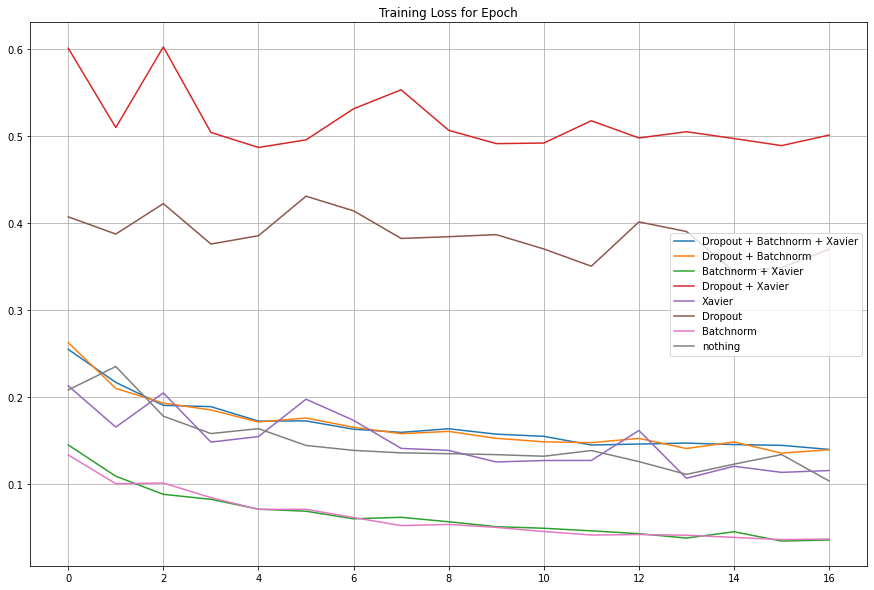

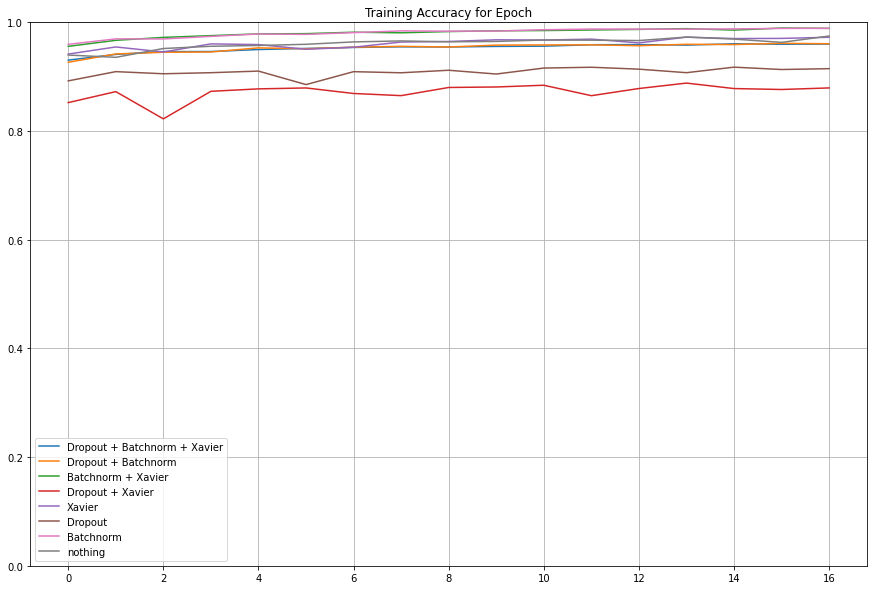

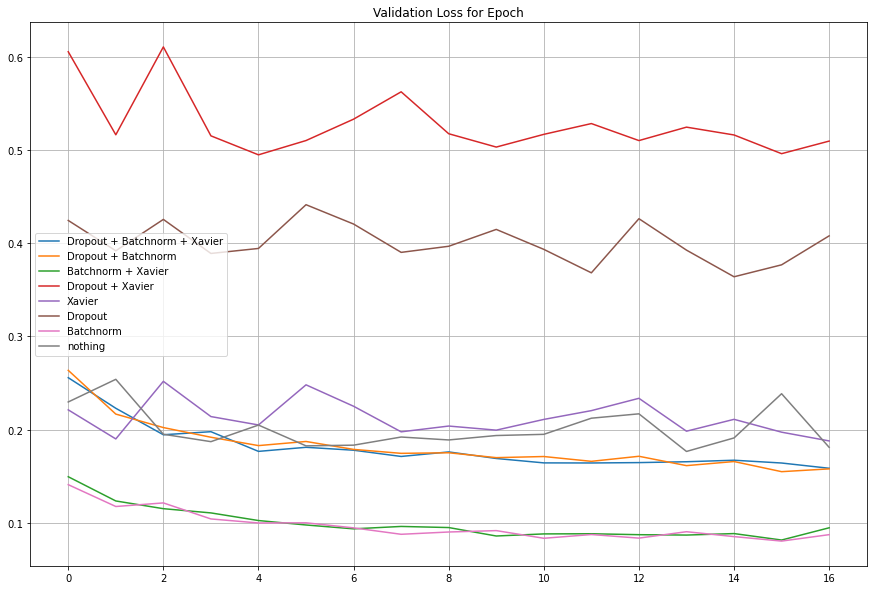

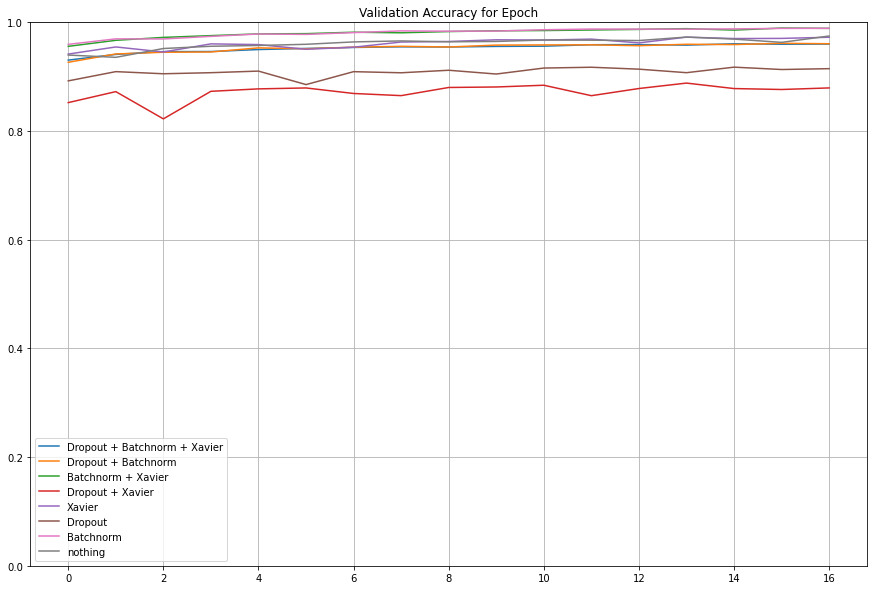

In [37]:
plot_compare(train_losses, title = 'Training Loss for Epoch')
plot_compare(train_accs, [0, 1.0], title='Training Accuracy for Epoch')

plot_compare(valid_losses, title='Validation Loss for Epoch')
plot_compare(train_accs, [0, 1.0], title='Validation Accuracy for Epoch')